<a href="https://colab.research.google.com/github/Nataliahfk/estadistica_python/blob/main/precios_de_inmuebles_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Precificación inmobiliaria**

**Objetivo**: Estimar los precios de los inmuebles.
 * Identificar los aspectos que tienen más influencia en la precificación de los inmuebles.
 * Entender cuál de todos estos aspectos es el más relevante.
 * Precificar un inmueble nuevo.

Base de datos simplificada e inspirada en [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)



![](https://i.imgur.com/A8X79yq.jpeg)


# 1. Ajustando una recta

## Conociendo los datos

In [71]:
#Leyendo los datos
import pandas as pd

datos = pd.read_csv('/content/precios_casas.csv')
datos.head(5)

,Id,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente,precio_de_venta
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0
2,3,85.4680,1,80.4514,2,608,0,1101855.0
3,4,89.2769,1,70.2324,1,642,0,690200.0
4,5,106.3705,1,97.8237,2,836,0,1232500.0


In [72]:
#Cuáles factores fueron colectados
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           1438 non-null   int64  
 1   area_primer_piso             1438 non-null   float64
 2   tiene_segundo_piso           1438 non-null   int64  
 3   area_segundo_piso            1438 non-null   float64
 4   cantidad_banos               1438 non-null   int64  
 5   capacidad_carros_garage      1438 non-null   int64  
 6   calidad_de_cocina_excelente  1438 non-null   int64  
 7   precio_de_venta              1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [73]:
# vamos a eliminar la primera columna ID, ya que es un valor unico por lo que no se necesita para el analisis
datos = datos.drop(columns = 'Id')
datos.columns

Index(['area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente', 'precio_de_venta'],
      dtype='object')

## Correlación

**¿Cuáles factores están relacionados con el precio de la casa? ¿Cómo es esa relación?**

El coeficiente de correlación de Pearson nos permite medir la relación lineal entre variables, ofreciendo una escala que varía de -1 a 1, la cual interpretamos según su intensidad y dirección:

* **-1**: correlación negativa perfecta: a medida que una variable aumenta, la otra disminuye.  
* **0**: no hay relación lineal entre las variables.  
* **1**: correlación positiva perfecta: a medida que una variable aumenta, la otra también aumenta.  



In [74]:
# Correlación
corr = datos.corr() # corr esta en la biblioteca pandas

In [75]:
# aqui saco la correlacion del precio vs los otros atibutos de la cas, si tienden a mayor 0 es positiva , en este caso son todas positivas,
# la que tiene tiene_segundo_piso	0.138541 es una correlación más leve
corr['precio_de_venta']

,precio_de_venta
area_primer_piso,0.616557
tiene_segundo_piso,0.138541
area_segundo_piso,0.305311
cantidad_banos,0.563132
capacidad_carros_garage,0.640214
calidad_de_cocina_excelente,0.496223
precio_de_venta,1.000000


In [76]:
# Actividad
# Cuáles factores están más correlacionados?
corr['area_primer_piso']

,area_primer_piso
area_primer_piso,1.000000
tiene_segundo_piso,-0.376805
area_segundo_piso,-0.253793
cantidad_banos,0.369368
capacidad_carros_garage,0.481231
calidad_de_cocina_excelente,0.323496
precio_de_venta,0.616557


In [77]:
corr['area_segundo_piso']

,area_segundo_piso
area_primer_piso,-0.253793
tiene_segundo_piso,0.917101
area_segundo_piso,1.000000
cantidad_banos,0.412777
capacidad_carros_garage,0.131938
calidad_de_cocina_excelente,0.025248
precio_de_venta,0.305311


In [78]:
corr['calidad_de_cocina_excelente']

,calidad_de_cocina_excelente
area_primer_piso,0.323496
tiene_segundo_piso,-0.020045
area_segundo_piso,0.025248
cantidad_banos,0.154102
capacidad_carros_garage,0.276759
calidad_de_cocina_excelente,1.000000
precio_de_venta,0.496223


In [79]:
corr['cantidad_banos']

,cantidad_banos
area_primer_piso,0.369368
tiene_segundo_piso,0.292780
area_segundo_piso,0.412777
cantidad_banos,1.000000
capacidad_carros_garage,0.409281
calidad_de_cocina_excelente,0.154102
precio_de_venta,0.563132


In [80]:
corr['capacidad_carros_garage']

,capacidad_carros_garage
area_primer_piso,0.481231
tiene_segundo_piso,-0.001284
area_segundo_piso,0.131938
cantidad_banos,0.409281
capacidad_carros_garage,1.000000
calidad_de_cocina_excelente,0.276759
precio_de_venta,0.640214


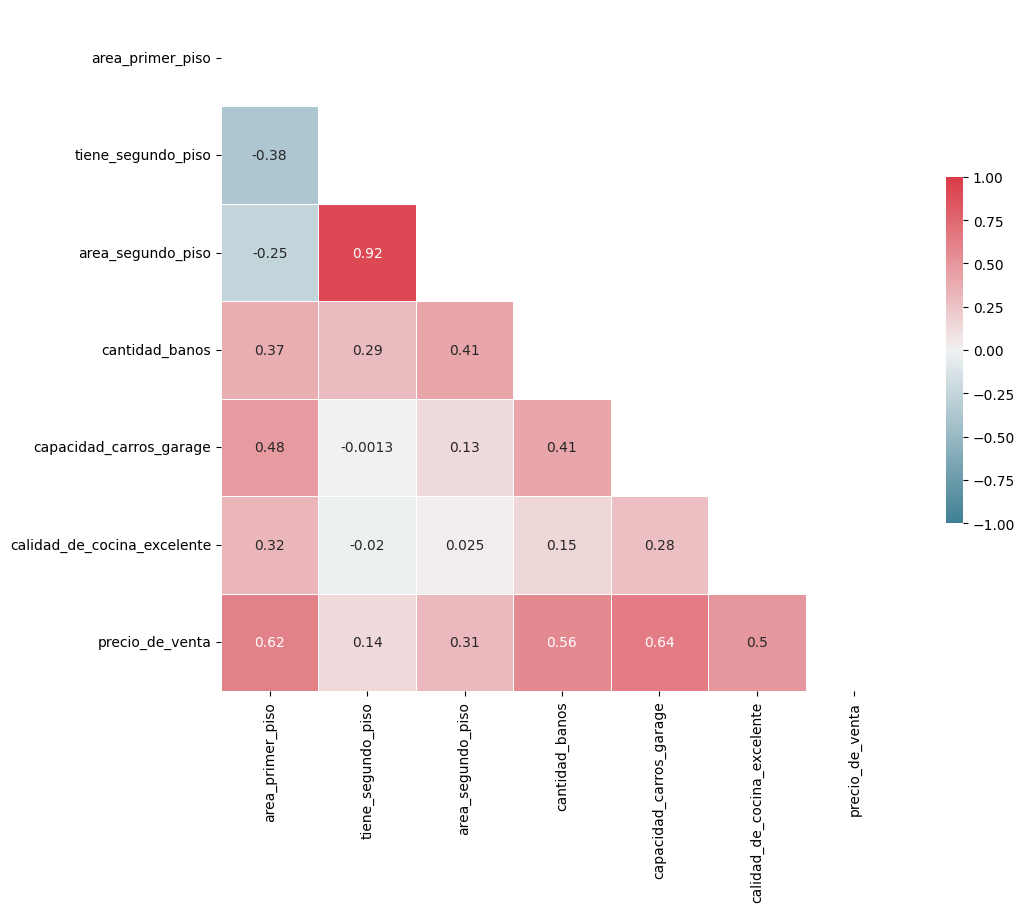

In [81]:
# Actividad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Leyendo datos
datos = pd.read_csv("/content/precios_casas.csv")
datos = datos.drop(columns = "Id")

# Correlación
corr = datos.corr()

# ¿Qué factores están más correlacionados?

# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

 Presta atención a los puntos a continuación para un análisis completo:

Intensidad: se refiere a la fuerza de la relación entre las variables medidas. Puede variar de -1 a +1, donde -1 indica una correlación perfectamente negativa, +1 indica una correlación perfectamente positiva y 0 indica ausencia de correlación lineal.
Dirección: se refiere a la naturaleza de la relación entre las variables medidas. Una correlación positiva indica que las variables aumentan o disminuyen juntas, mientras que una correlación negativa indica que una variable aumenta mientras la otra disminuye, o viceversa.
<br><br>
Ejemplo:

El coeficiente de correlación lineal entre el área del primer piso y el precio de venta es de 0.62, indicando una correlación positiva moderadamente fuerte (intensidad). En general, a medida que el área del primer piso de una casa aumenta, el precio de venta también tiende a aumentar (dirección).

## Relacionando variables

In [82]:
# importando los paquetes para la visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

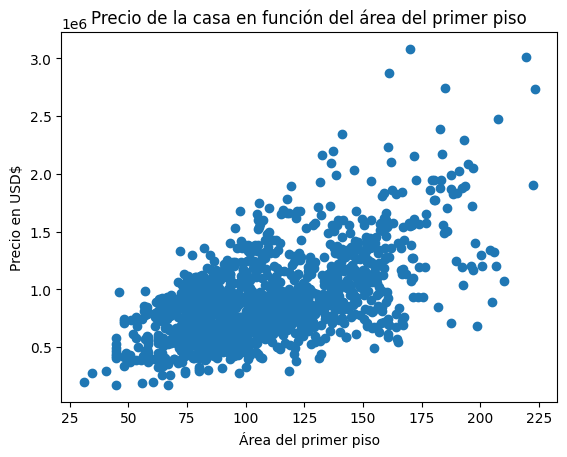

In [83]:
# Cómo se relacionan el área construída y el precio del inmueble?
plt.scatter(datos['area_primer_piso'], datos['precio_de_venta'])
plt.title('Precio de la casa en función del área del primer piso')
plt.xlabel('Área del primer piso')
plt.ylabel('Precio en USD$')
plt.show()

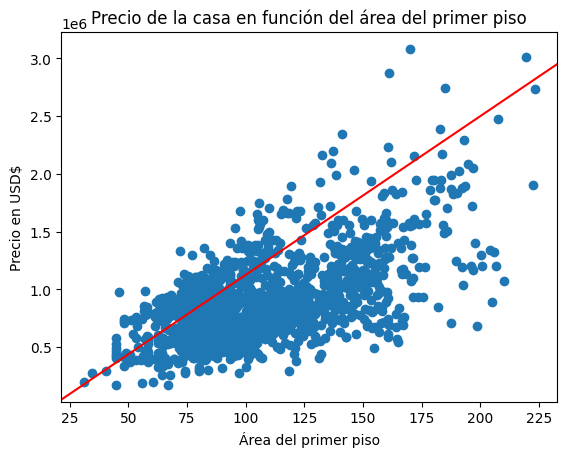

In [84]:
# Aparentemente mientras mayor es el área del primer piso, mayor es el precio de la casa.
# si quisieramos trazar una línea que nos permita describir este comportamiento?

plt.scatter(datos['area_primer_piso'], datos['precio_de_venta'])
plt.axline(xy1=(40, 300000), xy2=(200, 2500000), color= 'red')
plt.title('Precio de la casa en función del área del primer piso')
plt.xlabel('Área del primer piso')
plt.ylabel('Precio en USD$')
plt.show()

## Mejor recta

In [85]:
# Cuál es la recta que mejor se ajusta a esta relación
# utilizar el metodo de los minimos cuadrados ordinarios OLS , hallar los residuos minimos, minimizar la distancia a la recta

px.scatter(datos, x='area_primer_piso', y='precio_de_venta', trendline_color_override='red', trendline='ols') # trendline_color_override linea de tendencia


# 2. Explicando la recta
Ajustamos una recta entre los $m^2$ del primer piso y el precio de la casa. Queremos explicar el precio de la casa a partir de su tamaño, por eso decimos que:

* Variable explicativa/independiente: Área del primer piso  (X)
* Variable de respuesta/dependiente: Precio de la casa  en la (Y)

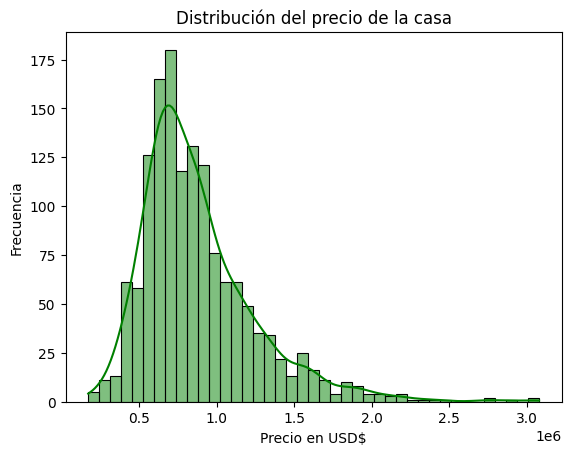

In [86]:
#Quién es nuestra variable de respuesta?
sns.histplot(datos['precio_de_venta'], kde=True, color='green')
plt.title('Distribución del precio de la casa')
plt.xlabel('Precio en USD$')
plt.ylabel('Frecuencia')
plt.show()

# aqui se puede visualizar que la concentración o la mayor frecuencia de precio se encuentra alrededor de los 700 - 800 dolares

### Separando datos para entrenamiento y para prueba

El conjunto de **entrenamiento** se utiliza para ajustar el modelo, mientras que el conjunto de **prueba** se usa para evaluar su desempeño al predecir precios de viviendas no vistos durante el entrenamiento, lo que ayuda a la generalización del modelo.

In [87]:
# import train_test_split
from sklearn.model_selection import train_test_split # este paquete nos permite tomar la base y hacer una repartcion entre una base de entrenaminto y una base de prueba

y = datos['precio_de_venta']  # en la variable y almacenamos todos los precios de venta
X = datos.drop(columns = 'precio_de_venta')	 # en x almacenamoos todo el resto, excepto el precio de ventas por eso el drop

# X_train es X de entrenamiento y X_test x de prueba, lo mismo para y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=230) # test_size (tamaño de la muestra), random_state ( estado de aleatoriedad)
                                                                                           # random state sirve para garantizar la reproductibilidad de la segregación de los datos.


In [88]:
#Datos de entrenamiento para usar la fórmula
df_train = pd.DataFrame(X_train)  # variable independiente
df_train['precio_de_venta'] = y_train # variable dependiente

In [89]:
# import ols
from statsmodels.formula.api import ols

In [90]:
# ajustando el primer modelo
modelo_0 = ols('precio_de_venta ~ area_primer_piso', data=df_train).fit()  # fit() es para entrenar al modelo_0 con los atributos indicados

## Analizando los coeficientes

(intensidad, dirección y significancia)




In [121]:
# visualizando los parámetros
modelo_0.params

,0
Intercept,152909.288334
area_primer_piso,6793.641641


- Intercept:	152909.288334 / esto quiere decir que si el area del inmueble es 0 el valor sera de 152.909 US.

- area_primer_piso	6793.641641 ( esto es la pendiente o la inclinación) cada vez que aunmeta el m2 aumentara en 6793 US.
ej: el area de la casa es de 50 m2 sería 50*6793 = 339.650 US


In [122]:
# El resumen del modelo /summary es el resumen
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Thu, 14 Aug 2025   Prob (F-statistic):          2.22e-105
Time:                        18:36:37   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.529e+05   3.07e+04  

- El **punto de intercepción** es el valor esperado del precio de la casa cuando todas las demás variables son cero. En este caso, cuando todas las demás variables, incluida el área del primer piso, son cero, el precio esperado de la casa es de $145.196,40. No siempre se tiene una interpretación práctica para este número.

- El **efecto individual** del área es de \$6.833,97. Esto indica que por cada metro cuadrado adicional al área del primer piso, se espera que el precio de la casa aumente en promedio \$6.833,97.

<img src="https://i.ibb.co/CJwfMgW/coeficientes.png" alt="coeficientes" border="0">


**Estimación de la regresión lineal simple**

La regresión lineal fue la metodología que ajustó la mejor línea que representa linealmente la interacción entre X e Y; en nuestro caso, el tamaño del área del primer piso y el precio de venta de la casa.

Vale la pena repasar cada componente de la regresión lineal:

       Formula:
              Y = B0 + B1 X + e

- Variable Respuesta (Y): También llamada variable dependiente, es aquella que estamos tratando de predecir.

- Intercepto (β₀): El punto donde la línea de regresión intercepta el eje vertical (Y), es decir, el valor de Y cuando X es igual a 0.

- Variable Explicativa (X): También llamada variable independiente, es el factor que usamos para predecir y explicar la variable respuesta.

- Coeficientes de Regresión (β₁): Impacto de cada variable explicativa X en la variable respuesta, es el efecto de X en Y.

- Error Residual (e): Diferencia entre los valores reales y previstos de la variable respuesta. (desvio estandar)

<br>
- Coeficientes:  

La relación lineal entre las variables X e Y se representa gráficamente por una línea. Este proceso de encontrar la línea ideal implica minimizar la distancia entre los puntos reales y la propia línea.

El ajuste de la línea de regresión lineal se simplifica mediante el método de los mínimos cuadrados. Este método tiene como objetivo encontrar la línea que mejor se ajusta a los datos observados, minimizando la suma de los cuadrados de las diferencias entre los valores reales y los valores previstos por la línea y calculando los coeficientes del modelo.





## Explicabilidad del modelo

**¿En qué medida la variación del área explica los diversos precios de las casas?**  

En este caso, recurrimos a la métrica R², el coeficiente de determinación. El R² varía de 0 a 1, donde 1 indica un ajuste perfecto del modelo a los datos, es decir, todas las variaciones en la variable dependiente son explicadas por las variables independientes en el modelo. Por otro lado, un R² de 0 indica que el modelo no explica ninguna variabilidad en la variable dependiente.

In [123]:
# observando el R²
modelo_0.rsquared

# en este caso me indica que la variación del area del primer piso, me explica el 37% de la variación del precio de la casa.
# resta un 62% app del precio de la casa que no está siendo explicado por la variación del area del priemr piso.

np.float64(0.37728010994297867)

El coeficiente de determinación, frecuentemente llamado R², es una medida estadística que indica cuánto de la variabilidad de la variable dependiente (respuesta) es explicada por el modelo de regresión lineal.<br><br>

**Interpretando el R²**

Varía de 0 a 1, un valor cercano a 1 indica que el modelo se ajusta bien a los datos, explicando la mayor parte de la variación en la variable dependiente/respuesta. Por otro lado, un valor cercano a 0 indica que el modelo no puede explicar mucha variación en la variable dependiente/respuesta.
<br><br>

**Usando en la prueba**

Además, el R² puede ser utilizado para comparar el rendimiento del modelo en diferentes conjuntos de datos, como entrenamiento y prueba. Esto ayuda a identificar problemas de sobreajuste (overfitting) o subajuste (underfitting). Idealmente, deseamos que el R² sea consistente entre los conjuntos de entrenamiento y prueba, indicando una buena capacidad de generalización del modelo para nuevos datos.
<br><br>

**Fórmula**

Una de las fórmulas del R² puede ser representada por la razón entre la variación explicada y la variación total. Por eso decimos que cuanto más cerca de 1, mejor es la adecuación del modelo, ya que la variación explicada será más cercana a la variación total en esta razón.

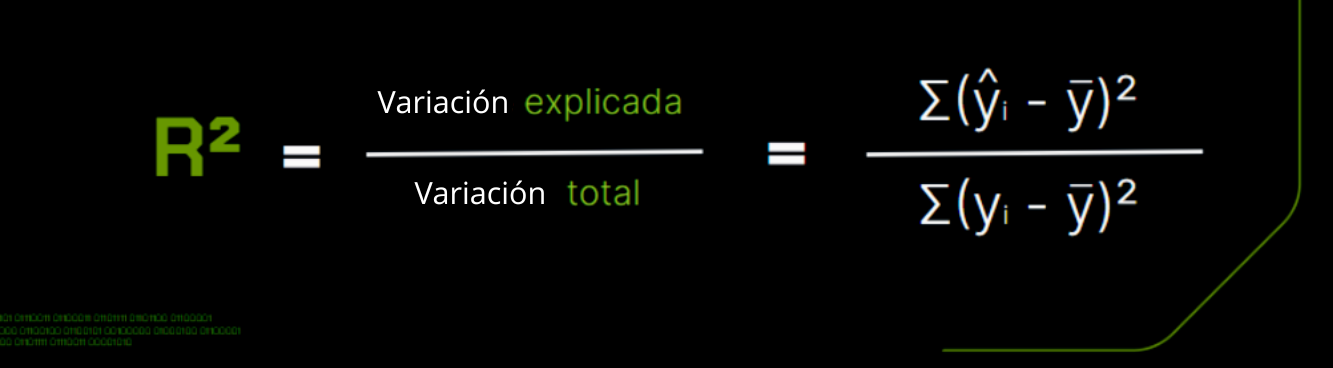



## Entendiendo el resíduo

In [94]:
# Quiénes son los residuos?


In [95]:
# Cómo están distribuidos


<img src="https://i.ibb.co/zGTB35V/residuos.png" alt="residuos" border="0">

## Obteniendo el R² de la previsión

In [96]:
# definiendo la 'Y' prevista


In [97]:
# importando el r2_score


In [98]:
# mostrando el resultado de r²


# 3. Añadiendo otras características

El modelo con un solo factor nos mostró un R² de 0.38, es decir, aproximadamente el 38% de la variación observada en los precios de las casas puede explicarse por la variación en el área.  
Esto indica que aún existe una cantidad significativa de variación que no está siendo capturada por este modelo específico. Analizaremos otros factores para explicar el precio de las casas.

## Analizando los factores

In [99]:
# cuáles otras características podrían explicar el precio de los inmuebles?


In [100]:
#Vamos a analizar solamente y_vars='precio_de_venta'


## Añadiendo factores al modelo

In [101]:
# importando la api de statsmodels


In [102]:
# Añadiendo una constante


In [103]:
# Creando el modelo de regresión (con todas las variables): saturado


In [104]:
# Modelo sin el área del segundo piso


In [105]:
# Modelo sin la información del garage
# Modelo sin el área del segundo piso


In [106]:
# Resumen del modelos


## Comparando los modelos
Cuál es el modelo?


In [107]:
# Cuántos parámetros tiene el modelo?


# 4. Precificando las casas

## Obteniendo el R² de la previsión

In [108]:
# Añadiendo una constante en X_test


In [109]:
# Previsión con el modelo 3


In [110]:
# Cuál es el r² de la previsión?


In [111]:
# Cuál es el R² del entrenamiento?


## Precificando una casa

<img src="https://i.ibb.co/SvG4V4j/costo.png" alt="costo" border="0">

In [112]:
#Nuevo inmueble


In [113]:
# Cuál es el precio del inmueble de acuerdo con el modelo 0?


In [114]:
#Cuál es el precio del inmueble de acuerdo con el modelo 3?


## Precificando varias casas

<img src="https://i.imgur.com/i0skFlB.jpeg" width="600"/>

In [115]:
# Leyendo varias casas?


In [116]:
# Añadiendo una constante


In [117]:
# Cuál es el precio de estas nuevas casas?
# precio_casas = pd.DataFrame()


# 5. Investigando el modelo





## Multicolinearidad

Cuando dos o más cosas que estás intentando estudiar son tan parecidas que es difícil determinar cuánto está influyendo cada una de ellas en el resultado.

In [118]:
# importar el VIF de statsmodel


In [119]:
# VIF 1


In [120]:
# VIF 3


## Análisis de los residuos

Residuos: la discrepancia entre los valores reales y los valores que el modelo predice para los mismos puntos de datos.

<img src="https://i.ibb.co/9bmySbm/heterocedasticidad.png" alt="heterocedasticidad" border="0">